<a href="https://colab.research.google.com/github/YES-studyNproject/study/blob/main/ch09_%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%A5%BC_%EC%9C%84%ED%95%9C_%EC%9D%B8%EA%B3%B5_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 09. 텍스트를 위한 인공 신경망

## 09-1. 순차 데이터와 순환 신경망

### 순차 데이터 
* 순차 데이터: 순서에 의미 있는 데이터
* 피스포워드 신경망(FFNN): 입력 데이터의 흐름이 앞으로만 전달되는 신경망

### 순환 신경망
* 순환 신경망: 완전 연결 신경망 + 이전 데이터의 처리 흐름을 순환하는 고리 추가
* 타임스텝: 샘플을 처리하는 한 단계
* 셀: 순환 신경망에서의 층
* 은닉 상태: 셀의 출력
* tanh(하이퍼블릭 탄젠트): 은닉층의 활성화 함수

### 셀의 가중치와 입출력
* 순환층 = 셀
* 하나의 시퀀스 = 하나의 샘플
* 시퀀스의 길이 = 타임스텝 길이
* 셀의 입력
  * 2차원 배열 
  * 타임스텝, 단어 표현
* 셀의 출력
  * 1차원 배열 (1차원 배열의 크기: 순환층의 뉴런 개수)
  * 마지막 타임스텝의 은닉 상태만 출력
* 여러 개의 층일 때 셀의 출력
  * 마지막 셀을 제외한 모든 셀: 모든 타임스텝의 은닉 상태를 출력
  * 마지막 셀:마지막 타임스템의 은닉 상태만 출력
* 출력층: 밀집층 - 클래스 분류
  * 다중 분류: 출력층에 클래스 개수만큼 뉴런, 소프트맥스 활성화 함수
  * 이진 분류: 하나의 뉴런, 시그모이드 활성화 함수



## 09-2. 순환 신경망으로 IMDB 리뷰 분류하기

### IMDB 리뷰 데이터셋
* 자연어 처리(NLP): 음성 인식, 기계 번역, 감성 분석
* 말뭉치: 자연어 처리 분야 훈련 데이터
* 토큰
  * 영어 문장에서 소문자로 변환, 구두점 삭제, 공백을 기준으로 분리한 단어들
  * 한글에서 형태소 분석 (KoNLPy)
* 어휘 사전: 훈련 세트에서 고유한 단어를 뽑아 만든 목록



In [ ]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500) # num_word=500: 전체 데이터셋에서 가장 자주 드앚ㅇ하는 단어 500개

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
print(train_input.shape, test_input.shape) # 1차원 배열: 파이썬 리스트 객체로 이뤄진 넘파이 배열

(25000,) (25000,)


In [ ]:
print(len(train_input[0]))

218


In [ ]:
print(len(train_input[1]))

189


In [ ]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [ ]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [ ]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [ ]:
import numpy as np

lengths = np.array([len(x) for x in train_input])

In [ ]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


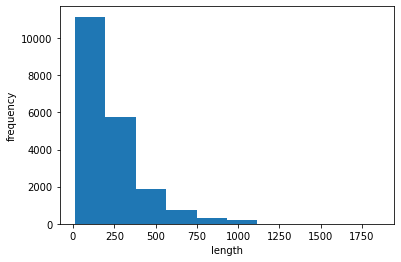

In [ ]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [ ]:
# 패딩
from tensorflow.keras.preprocessing.sequence import pad_sequences 

train_seq = pad_sequences(train_input, maxlen=100)

In [ ]:
print(train_seq.shape)

(20000, 100)


In [ ]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [ ]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [ ]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [ ]:
val_seq = pad_sequences(val_input, maxlen=100)

### 순환 신경망 만들기

In [ ]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500))) # 순환 신경망
# 첫 번째 차원: 샘플의 길이 100개
# 두 번째 차원: 고유한 단어 개수 500개 (원-핫 인코딩)
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
# 원-핫 인코딩
train_oh = keras.utils.to_categorical(train_seq)

In [ ]:
print(train_oh.shape)

(20000, 100, 500)


In [ ]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [ ]:
print(np.sum(train_oh[0][0]))

1.0


In [ ]:
val_oh = keras.utils.to_categorical(val_seq)

In [ ]:
model.summary()

# 모델 파라미터 개수 = 4000 + 64 + 8 = 4072
# 500(입력) * 8(뉴런 개수) = 4000
# 8(은닉 상태 크기) * 8(뉴런 개수) = 64
# 8(뉴런마다 하나의 절편)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 4072      
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


### 순환 신경망 훈련하기

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 38s 110ms/step - loss: 0.6964 - accuracy: 0.4965 - val_loss: 0.6961 - val_accuracy: 0.4894
Epoch 2/100
313/313 [==============================] - 32s 102ms/step - loss: 0.6938 - accuracy: 0.5041 - val_loss: 0.6945 - val_accuracy: 0.4946
Epoch 3/100
313/313 [==============================] - 32s 102ms/step - loss: 0.6923 - accuracy: 0.5143 - val_loss: 0.6933 - val_accuracy: 0.5078
Epoch 4/100
313/313 [==============================] - 31s 100ms/step - loss: 0.6911 - accuracy: 0.5243 - val_loss: 0.6926 - val_accuracy: 0.5126
Epoch 5/100
313/313 [==============================] - 32s 102ms/step - loss: 0.6900 - accuracy: 0.5321 - val_loss: 0.6917 - val_accuracy: 0.5252
Epoch 6/100
313/313 [==============================] - 31s 100ms/step - loss: 0.6889 - accuracy: 0.5411 - val_loss: 0.6909 - val_accuracy: 0.5362
Epoch 7/100
313/313 [==============================] - 31s 100ms/step - loss: 0.6876 - accuracy: 0.5484 - val_loss: 0.6900 -

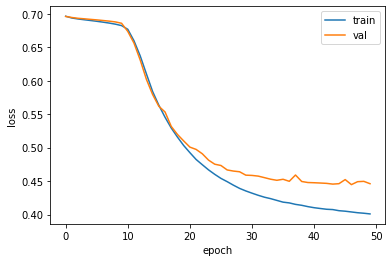

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 단어 임베딩을 사용하기
* 단어 임베딩
  * 순환 신경망에서 텍스트를 처리할 때 즐겨 사용
  * 각 단어를 고정된 크기의 실수 벡터로 변환

In [ ]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100)) # 임베딩
# 첫 번째 매개변수: 어휘 사전의 크기
# 두 번째 매개변수: 임베딩 벡터의 크기
# 세 번째 input_length 매개변수: 입력 시퀀스의 길이
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 8)                 200       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 45s 138ms/step - loss: 0.6885 - accuracy: 0.5390 - val_loss: 0.6777 - val_accuracy: 0.5888
Epoch 2/100
313/313 [==============================] - 43s 136ms/step - loss: 0.6352 - accuracy: 0.6608 - val_loss: 0.6000 - val_accuracy: 0.7100
Epoch 3/100
313/313 [==============================] - 43s 138ms/step - loss: 0.5780 - accuracy: 0.7263 - val_loss: 0.5707 - val_accuracy: 0.7300
Epoch 4/100
313/313 [==============================] - 42s 135ms/step - loss: 0.5466 - accuracy: 0.7505 - val_loss: 0.5402 - val_accuracy: 0.7486
Epoch 5/100
313/313 [==============================] - 43s 136ms/step - loss: 0.5244 - accuracy: 0.7669 - val_loss: 0.5316 - val_accuracy: 0.7550
Epoch 6/100
313/313 [==============================] - 43s 136ms/step - loss: 0.5079 - accuracy: 0.7767 - val_loss: 0.5142 - val_accuracy: 0.7678
Epoch 7/100
313/313 [==============================] - 43s 138ms/step - loss: 0.4963 - accuracy: 0.7835 - val_loss: 0.5149 -

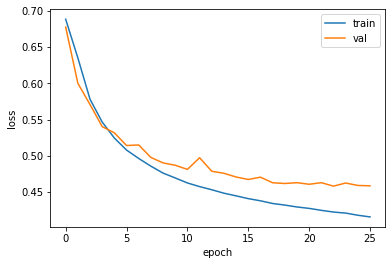

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 09-2. LSTM과 GRU 셀

### LSTM 신경망 훈련하기

In [ ]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [ ]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 13s 21ms/step - loss: 0.6922 - accuracy: 0.5435 - val_loss: 0.6906 - val_accuracy: 0.5886
Epoch 2/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6877 - accuracy: 0.6327 - val_loss: 0.6829 - val_accuracy: 0.6708
Epoch 3/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6647 - accuracy: 0.6944 - val_loss: 0.6343 - val_accuracy: 0.7098
Epoch 4/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6053 - accuracy: 0.7117 - val_loss: 0.5918 - val_accuracy: 0.7134
Epoch 5/100
313/313 [==============================] - 6s 19ms/step - loss: 0.5763 - accuracy: 0.7304 - val_loss: 0.5709 - val_accuracy: 0.7320
Epoch 6/100
313/313 [==============================] - 6s 19ms/step - loss: 0.5540 - accuracy: 0.7467 - val_loss: 0.5487 - val_accuracy: 0.7470
Epoch 7/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5326 - accuracy: 0.7625 - val_loss: 0.5285 - val_accuracy

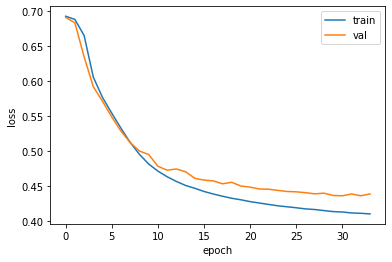

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 순환 층에 드롭아웃 적용하기

In [ ]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 21ms/step - loss: 0.6929 - accuracy: 0.5147 - val_loss: 0.6927 - val_accuracy: 0.5338
Epoch 2/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6918 - accuracy: 0.5716 - val_loss: 0.6911 - val_accuracy: 0.5994
Epoch 3/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6887 - accuracy: 0.6428 - val_loss: 0.6851 - val_accuracy: 0.6766
Epoch 4/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6666 - accuracy: 0.6772 - val_loss: 0.6351 - val_accuracy: 0.7054
Epoch 5/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6195 - accuracy: 0.6981 - val_loss: 0.6059 - val_accuracy: 0.7084
Epoch 6/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5951 - accuracy: 0.7171 - val_loss: 0.5846 - val_accuracy: 0.7296
Epoch 7/100
313/313 [==============================] - 6s 19ms/step - loss: 0.5743 - accuracy: 0.7350 - val_loss: 0.5613 - val_accuracy:

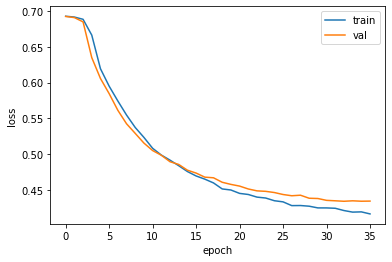

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 2개의 층을 연결하기

In [ ]:
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 8)            800       
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 17s 43ms/step - loss: 0.6927 - accuracy: 0.5375 - val_loss: 0.6921 - val_accuracy: 0.5916
Epoch 2/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6900 - accuracy: 0.5748 - val_loss: 0.6862 - val_accuracy: 0.6402
Epoch 3/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6643 - accuracy: 0.6443 - val_loss: 0.6234 - val_accuracy: 0.6786
Epoch 4/100
313/313 [==============================] - 13s 40ms/step - loss: 0.5833 - accuracy: 0.7151 - val_loss: 0.5522 - val_accuracy: 0.7318
Epoch 5/100
313/313 [==============================] - 13s 41ms/step - loss: 0.5374 - accuracy: 0.7417 - val_loss: 0.5187 - val_accuracy: 0.7554
Epoch 6/100
313/313 [==============================] - 13s 41ms/step - loss: 0.5097 - accuracy: 0.7574 - val_loss: 0.4940 - val_accuracy: 0.7682
Epoch 7/100
313/313 [==============================] - 13s 40ms/step - loss: 0.4920 - accuracy: 0.7671 - val_loss: 0.4819 - val_ac

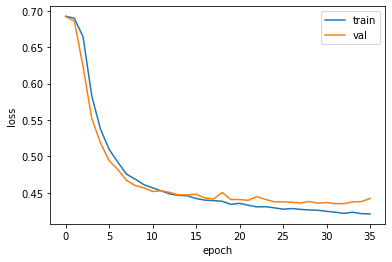

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### GRU 신경망 훈련하기

In [ ]:
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
gru (GRU)                    (None, 8)                 624       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 21ms/step - loss: 0.6924 - accuracy: 0.5174 - val_loss: 0.6914 - val_accuracy: 0.5478
Epoch 2/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6903 - accuracy: 0.5601 - val_loss: 0.6892 - val_accuracy: 0.5740
Epoch 3/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6871 - accuracy: 0.5849 - val_loss: 0.6855 - val_accuracy: 0.5888
Epoch 4/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6820 - accuracy: 0.6039 - val_loss: 0.6799 - val_accuracy: 0.5948
Epoch 5/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6744 - accuracy: 0.6191 - val_loss: 0.6713 - val_accuracy: 0.6132
Epoch 6/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6629 - accuracy: 0.6321 - val_loss: 0.6589 - val_accuracy: 0.6248
Epoch 7/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6457 - accuracy: 0.6491 - val_loss: 0.6391 - val_accuracy:

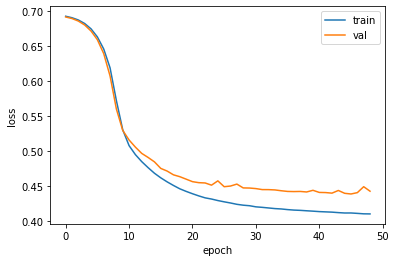

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 마무리

In [ ]:
test_seq = pad_sequences(test_input, maxlen=100)

rnn_model = keras.models.load_model('best-2rnn-model.h5')

rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 12s 15ms/step - loss: 0.4291 - accuracy: 0.8004


[0.4291330873966217, 0.8004400134086609]